<a href="https://colab.research.google.com/github/zahraniayudyaa/midterm-machine-learning/blob/main/Zahrani_UTS_ML_NoTuning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [ ]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=b95495d8-d655-48e1-9eac-86c03efc1bce
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:04<00:00, 90.4MB/s]


'midterm-regresi-dataset.csv'

In [ ]:
import pandas as pd

# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature /  kolom.
file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path)

df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [ ]:
print("df.shape:", df.shape) #ada 515344 row/baris dan 90 feature

df.shape: (515344, 91)


In [ ]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB")  #ukuran 422.88 MB, deadline 2 minggu. ngerjain mepet pasti ga kelar :))))

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


**Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Memisahkan fitur dan target (target adalah kolom pertama)
X = df.iloc[:, 1:]  # Fitur: semua kolom kecuali kolom 0
y = df.iloc[:, 0]   # Target: kolom pertama (tahun rilis)

In [ ]:
# Memberi nama kolom fitur
X.columns = [f'feature_{i}' for i in range(1, X.shape[1] + 1)]

print("Shape dataset:", df.shape)
print("Jumlah fitur:", X.shape[1])
print("\n5 baris pertama:")
print(pd.concat([y.rename('target'), X.head()], axis=1))
print("\nStatistik deskriptif target:")
print(y.describe())

Shape dataset: (515344, 91)
Jumlah fitur: 90

5 baris pertama:
        target  feature_1  feature_2  feature_3  feature_4  feature_5  \
0         2001   48.73215   18.42930   70.32679   12.94636  -10.32437   
1         2001   50.95714   31.85602   55.81851   13.41693   -6.57898   
2         2001   48.24750   -1.89837   36.29772    2.58776    0.97170   
3         2001   50.97020   42.20998   67.09964    8.46791  -15.85279   
4         2001   50.54767    0.31568   92.35066   22.38696  -25.51870   
...        ...        ...        ...        ...        ...        ...   
515339    2006        NaN        NaN        NaN        NaN        NaN   
515340    2006        NaN        NaN        NaN        NaN        NaN   
515341    2006        NaN        NaN        NaN        NaN        NaN   
515342    2006        NaN        NaN        NaN        NaN        NaN   
515343    2005        NaN        NaN        NaN        NaN        NaN   

        feature_6  feature_7  feature_8  feature_9  ...  fea

In [ ]:
# Cek missing values
print("Missing values di X:", X.isnull().sum().sum())
print("Missing values di y:", y.isnull().sum())

# Jika ada missing values, isi dengan median
if X.isnull().sum().sum() > 0:
    X.fillna(X.median(), inplace=True)

# Deteksi outlier dengan IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).sum().sum()
print(f"Jumlah outlier potensial: {outliers}")

# Scaling fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data: 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

Missing values di X: 0
Missing values di y: 0
Jumlah outlier potensial: 2726607
Train: (360740, 90), Validation: (77302, 90), Test: (77302, 90)


In [ ]:
# Menggunakan korelasi dengan target untuk seleksi fitur
correlations = pd.Series([np.corrcoef(X.iloc[:, i], y)[0, 1] for i in range(X.shape[1])], index=X.columns)
top_features = correlations.abs().sort_values(ascending=False).head(20).index.tolist()
print("Top 20 fitur berdasarkan korelasi:", top_features[:5], "...")

# Pilih hanya fitur terpilih
X_train_selected = X_train[:, [X.columns.get_loc(f) for f in top_features]]
X_val_selected = X_val[:, [X.columns.get_loc(f) for f in top_features]]
X_test_selected = X_test[:, [X.columns.get_loc(f) for f in top_features]]

Top 20 fitur berdasarkan korelasi: ['feature_1', 'feature_6', 'feature_3', 'feature_63', 'feature_40'] ...


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    # 'SVR': SVR(kernel='rbf')
}

results_ml = {}

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_val_selected)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    results_ml[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.3f}")

# Pilih model terbaik berdasarkan RMSE
best_model_name = min(results_ml, key=lambda x: results_ml[x]['RMSE'])
print(f"\nModel terbaik: {best_model_name}")

Linear Regression: RMSE = 10.04, MAE = 7.37, R² = 0.155
Ridge Regression: RMSE = 10.04, MAE = 7.37, R² = 0.155
Lasso Regression: RMSE = 10.04, MAE = 7.37, R² = 0.155
Random Forest: RMSE = 9.49, MAE = 6.88, R² = 0.246
Gradient Boosting: RMSE = 9.63, MAE = 6.94, R² = 0.224

Model terbaik: Random Forest


In [ ]:
# from scipy.stats import randint, uniform
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# # Fungsi untuk hyperparameter tuning cepat
# def quick_hyperparameter_tuning(X_train, y_train, model_type='rf', n_iter=10):
#     """
#     Fungsi cepat untuk hyperparameter tuning dasar
#     """
#     if model_type == 'rf':
#         param_dist = {
#             'n_estimators': randint(50, 300),
#             'max_depth': [10, 20, 30, None],
#             'min_samples_split': randint(2, 20)
#         }
#         model = RandomForestRegressor()
#     elif model_type == 'gb':
#         param_dist = {
#             'n_estimators': randint(50, 300),
#             'learning_rate': uniform(0.01, 0.3),
#             'max_depth': randint(3, 8)
#         }
#         model = GradientBoostingRegressor()

#     # Scoring 'neg_rmse' is not standard. It should be 'neg_root_mean_squared_error'
#     # Correcting scoring parameter to standard scikit-learn metrics
#     random_search = RandomizedSearchCV(
#         model, param_dist, n_iter=n_iter,
#         cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1 # Corrected scoring
#     )
#     random_search.fit(X_train, y_train)

#     return random_search.best_estimator_, random_search.best_params_

# # Contoh penggunaan
# best_rf_model, best_rf_params = quick_hyperparameter_tuning(
#     X_train_selected, y_train, 'rf', n_iter=5
# )
# print(f"Best RF params (quick tuning): {best_rf_params}")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
    'Ridge Regression': {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

results_ml = {}

for name, model in models.items():
    if name in param_grids:
        # Grid Search untuk model dengan hyperparameters
        grid_search = GridSearchCV(model, param_grids[name],
                                  cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
        print(f"{name} - Best params: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train_selected, y_train)

    y_pred = best_model.predict(X_val_selected)

    # Calculate metrics
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    results_ml[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.3f}")

best_model_name = min(results_ml, key=lambda x: results_ml[x]['RMSE'])
print(f"\nModel terbaik: {best_model_name}")

Linear Regression: RMSE = 10.04, MAE = 7.37, R² = 0.155
Ridge Regression - Best params: {'alpha': 100}
Ridge Regression: RMSE = 10.04, MAE = 7.37, R² = 0.155
Lasso Regression - Best params: {'alpha': 0.001}
Lasso Regression: RMSE = 10.04, MAE = 7.37, R² = 0.155


=== HASIL EVALUASI PADA DATA TEST ===
MSE  : 89.35
RMSE : 9.45
MAE  : 6.87
R²   : 0.246


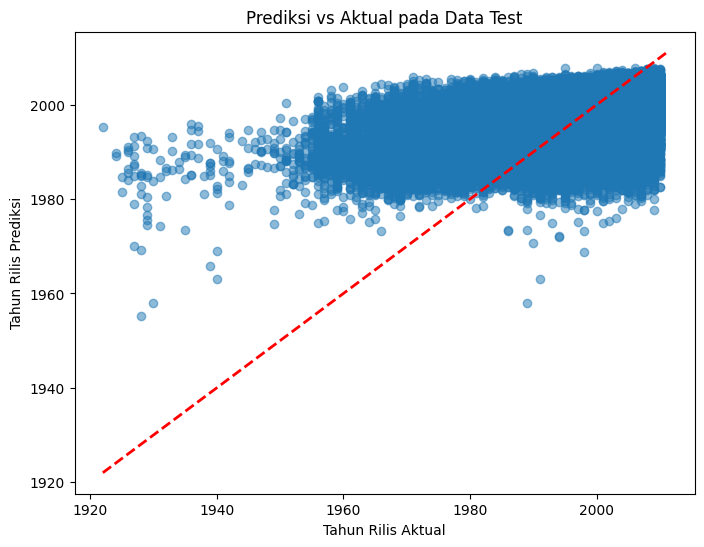

In [ ]:
# Gunakan model terbaik untuk prediksi test
best_model = models[best_model_name]
best_model.fit(X_train_selected, y_train)
y_pred_test = best_model.predict(X_test_selected)

# Metrics
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("=== HASIL EVALUASI PADA DATA TEST ===")
print(f"MSE  : {mse_test:.2f}")
print(f"RMSE : {rmse_test:.2f}")
print(f"MAE  : {mae_test:.2f}")
print(f"R²   : {r2_test:.3f}")

# Visualisasi prediksi vs aktual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Tahun Rilis Aktual')
plt.ylabel('Tahun Rilis Prediksi')
plt.title('Prediksi vs Aktual pada Data Test')
plt.show()